In [1]:
import sqlite3
from IPython.display import Image

connect = sqlite3.connect('ass3.db')
cursor = connect.cursor()


def query(input):
    cursor.execute(input)

    records = cursor.fetchall()

    for record in records:
        print(record)


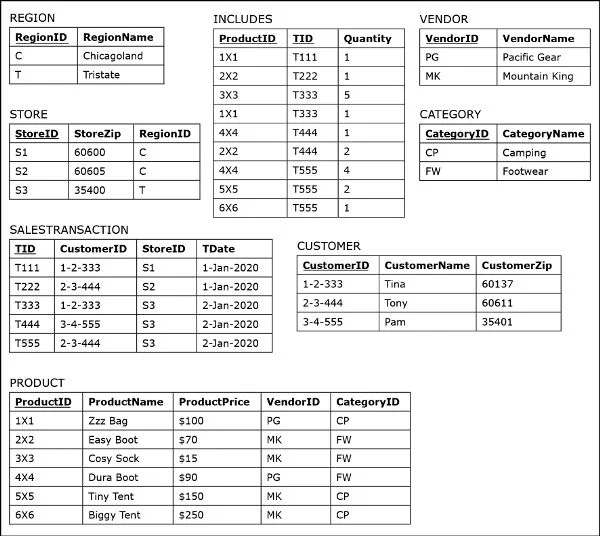

In [12]:
Image(filename='img1.png')

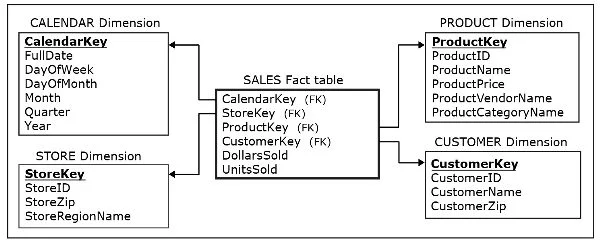

In [10]:
Image(filename='image2.png')


In [15]:
query('''
      select name
      from sqlite_master
      where type = "table"
      ''')


('vendor',)
('category',)
('product',)
('region',)
('store',)
('customer',)
('includes',)
('sqlite_sequence',)
('ProductDim',)
('CustomerDim',)
('StoreDim',)
('salesTransaction',)
('SalesFact',)
('CalendarDim',)


create data warehouse tables


In [132]:
cursor.execute('''
               create table ProductDim(
                    ProductKey integer not null primary key autoincrement,
                    ProductId int not null,
                    ProductName varchar not null,
                    ProductPrice int not null,
                    ProductVendorName varchar not null,
                    ProductCategoryName varchar not null)
               ''')

cursor.execute('''
               create table CustomerDim (
                   CustomerKey integer not null primary key autoincrement,
                   CustomerId int not null,
                   CustomerName varchar not null,
                   CustomerZip int not null
               )
               ''')

cursor.execute('''
               create table CalendarDim (
                   CalendarKey integer not null primary key autoincrement,
                   FullDate date not null,
                   DayOfWeek varchar not null,
                   DayOfMonth varchar not null,
                   Month varchar not null,
                   Quarter varchar not null,
                   Year varchar not null
               )
               ''')

cursor.execute('''
               create table StoreDim (
                   StoreKey integer not null primary key autoincrement,
                   StoreId int not null,
                   StoreZip int not null,
                   StoreRegionName varchar not null
               )
               ''')

cursor.execute('''
               create table SalesFact (
                   CalendarKey int not null references CalendarDim(CalendarKey),
                   StoreKey int not null references StoreDim(StoreKey),
                   ProductKey int not null references ProductDim(ProductKey),
                   CustomerKey int not null references CustomerDim(CustomerDim),
                   DollarsSold int not null,
                   UnitsSold int not null
               )
               ''')

connect.commit()


In [103]:
query('''
      drop table if exists temptable
      ''')

query('''
      create temp table temptable (
          calendarkey,
          storekey,
          productkey,
          customerkey
      )
      ''')

query('''
      insert into temptable(calendarkey)
      select calendarkey
      from calendardim
      ''')

query('''
      insert into temptable(storekey)
      select storekey
      from storedim
      ''')

query('''
      insert into temptable(productkey)
      select ProductKey
      from productdim''')

query('''insert into temptable(customerkey)
      select customerkey
      from customerdim''')

query('''
      insert into salesfact (
            calendarkey, 
            storekey, 
            productkey, 
            customerkey
            )
      select cd.calendarkey,
      sd.storekey,
      pd.productkey,
      cusd.customerkey
      
      from temptable as t
      left join calendardim as cd on cd.calendarkey = t.calendarkey
      left join storedim as sd on sd.storekey = t.storekey
      left join productdim as pd on pd.productkey = t.productkey
      left join customerdim as cusd on cusd.customerkey = t.customerkey
      ''')


query('''select * from salesfact''')


IntegrityError: NOT NULL constraint failed: SalesFact.StoreKey

In [47]:
query('''
      select quantity,
      quantity*productprice
      
      from includes as i
      join product as p on i.productid = p.productid
      
      group by tid
      
      ''')


(1, 100)
(1, 70)
(5, 75)
(1, 90)
(4, 360)


In [13]:
query('''
      select *
      from SalesFact as 
      ''')


# query prep


In [4]:
query('''
      select productid, productname, productprice, categoryname, vendorname
      from product as p
      join vendor as v on v.vendorid = p.vendorid
      join category as c on c.categoryid = p.categoryid
      ''')


('1X1', 'Zzz Bag', 100, 'Camping', 'Pacifica Gear')
('2X2', 'Easy Boot', 70, 'Footwear', 'Mountain King')
('3X3', 'Cosy Sock', 15, 'Footwear', 'Mountain King')
('4X4', 'Dura Boot', 90, 'Footwear', 'Pacifica Gear')
('5X5', 'Tiny Tent', 150, 'Camping', 'Mountain King')
('6X6', 'Biggy Tent', 250, 'Camping', 'Mountain King')


In [146]:
query('''
      select customerid, customername, customerzip
      from customer
      ''')


('1-2-333', 'Tina', '60137')
('2-3-444', 'Tony', '60611')
('3-4-555', 'Pam', '35401')


In [144]:
query('''
      select date(tdate) as FullDate,
      strftime('%w', tdate) as DayOfWeek,

      -------------------------------------- case for days of week
      case cast (strftime('%d', tdate) as integer)
      when 0 then 'Sunday'
      when 1 then 'Monday'
      when 2 then 'Tuesday'
      when 3 then 'Wednesday'
      when 4 then 'Thursday'
      when 5 then 'Friday'
      else 'Saturday' end as DayOfMonth,
      ------------------------------------- case for quarters
      case cast (strftime('m',tdate) as integer)
      when 1 | 2 | 3 then 'Q1'
      when 4 | 5 | 6 then 'Q2'
      when 7 | 8 | 9 then 'Q3'
      when 10 | 11 | 12 then 'Q4'
      else 'q4' end as Quarter,
      --------------------------------------
      strftime('%m', tdate) as Month,
      strftime('%Y', tdate) as Year
      
      from salestransaction
      ''')


('2020-01-01', '3', 'Monday', 'q4', '01', '2020')
('2020-01-01', '3', 'Monday', 'q4', '01', '2020')
('2020-01-02', '4', 'Tuesday', 'q4', '01', '2020')
('2020-01-02', '4', 'Tuesday', 'q4', '01', '2020')
('2020-01-02', '4', 'Tuesday', 'q4', '01', '2020')


In [150]:
query('''
      select storeid, storezip, RegionName as StoreRegionName
      from store as s
      join region as r on r.regionid = s.regionid
      ''')


('S1', '60600', 'Chicagoland')
('S2', '60605', 'Chicagoland')
('S3', '35400', 'Tristate')


In [167]:
query('''select * from includes''')


('1X1', 'T111', 1)
('2X2', 'T222', 1)
('3X3', 'T333', 5)
('1X1', 'T333', 1)
('4X4', 'T444', 1)
('2X2', 'T444', 2)
('4X4', 'T555', 4)
('5X5', 'T555', 2)
('6X6', 'T555', 1)


# insert into


In [13]:
cursor.execute('''delete from productdim''')

query('''
      with
      productQuery as (
            select productid, productname, productprice, categoryname, vendorname
            from product as p
            join vendor as v on v.vendorid = p.vendorid
            join category as c on c.categoryid = p.categoryid
      )
      
      insert into ProductDim (ProductId, ProductName, ProductPrice, ProductVendorName, ProductCategoryName)
      select *
      from productQuery
      ''')

connect.commit()


In [14]:
query('''
      select *
      from productDim
      ''')


(13, '1X1', 'Zzz Bag', 100, 'Camping', 'Pacifica Gear')
(14, '2X2', 'Easy Boot', 70, 'Footwear', 'Mountain King')
(15, '3X3', 'Cosy Sock', 15, 'Footwear', 'Mountain King')
(16, '4X4', 'Dura Boot', 90, 'Footwear', 'Pacifica Gear')
(17, '5X5', 'Tiny Tent', 150, 'Camping', 'Mountain King')
(18, '6X6', 'Biggy Tent', 250, 'Camping', 'Mountain King')


In [11]:
cursor.execute('''delete from customerdim''')

query('''
      with
      customerQuery as (
            select customerid, customername, customerzip
            from customer
      )
      
      insert into CustomerDim(CustomerId, CustomerName, CustomerZip)
      select *
      from customerQuery
      ''')

query('''
      select *
      from customerdim
      ''')


(10, '1-2-333', 'Tina', 60137)
(11, '2-3-444', 'Tony', 60611)
(12, '3-4-555', 'Pam', 35401)


In [10]:
cursor.execute('''delete from storedim''')

query('''
      with
      storeQuery as (
            select storeid, storezip, RegionName as StoreRegionName
            from store as s
            join region as r on r.regionid = s.regionid
      )
      
      insert into StoreDim(StoreId, StoreZip, StoreRegionName)
      select *
      from storeQuery
      ''')

query('''
      select *
      from storedim
      ''')


(7, 'S1', 60600, 'Chicagoland')
(8, 'S2', 60605, 'Chicagoland')
(9, 'S3', 35400, 'Tristate')


In [9]:
query('''
      with
      calendarQuery as (
        select distinct
        strftime('%w', tdate) as DayOfWeek,

        -------------------------------------- case for days of week
        case cast (strftime('%d', tdate) as integer)
        when 0 then 'Sunday'
        when 1 then 'Monday'
        when 2 then 'Tuesday'
        when 3 then 'Wednesday'
        when 4 then 'Thursday'
        when 5 then 'Friday'
        else 'Saturday' end as DayOfMonth,
        ------------------------------------- case for quarters
        case cast (strftime('m',tdate) as integer)
        when 1 | 2 | 3 then 'Q1'
        when 4 | 5 | 6 then 'Q2'
        when 7 | 8 | 9 then 'Q3'
        when 10 | 11 | 12 then 'Q4'
        else 'q4' end as Quarter,
        --------------------------------------
        strftime('%m', tdate) as Month,
        strftime('%Y', tdate) as Year
        
        from salestransaction
      ),


      calendarquery2 as (
            select distinct date(tdate) as FullDate
            from salestransaction
      )
      
      insert into calendardim(fulldate, dayofweek, dayofmonth, month, quarter, year)
      
      select *
      
      from calendarquery2, 
      calendarQuery
      ''')

query('''
      select * from calendardim''')


(1, '2020-01-01', '3', 'Monday', 'q4', '01', '2020')
(2, '2020-01-01', '4', 'Tuesday', 'q4', '01', '2020')
(3, '2020-01-02', '3', 'Monday', 'q4', '01', '2020')
(4, '2020-01-02', '4', 'Tuesday', 'q4', '01', '2020')


In [3]:
query('''delete from calendardim''')
connect.commit()
query('''select * from calendardim''')

In [8]:
query('''
      drop table calendardim
      ''')

cursor.execute('''
               create table CalendarDim (
                   CalendarKey integer not null primary key autoincrement,
                   FullDate date not null,
                   DayOfWeek varchar not null,
                   DayOfMonth varchar not null,
                   Month varchar not null,
                   Quarter varchar not null,
                   Year varchar not null
               )
               ''')